In [187]:
import os 
os.chdir("C:/Users/izele/Desktop/bootcamp/Homework") #change wd
os.getcwd()

'C:\\Users\\izele\\Desktop\\bootcamp\\Homework'

In [188]:
import pandas as pd
bank = pd.read_csv("hmelq.csv")
df_bank = bank.copy()
df_bank.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [189]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [190]:
df_bank = df_bank.dropna()
df_bank.isnull().values.any()

False

In [191]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


C:\Users\izele\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


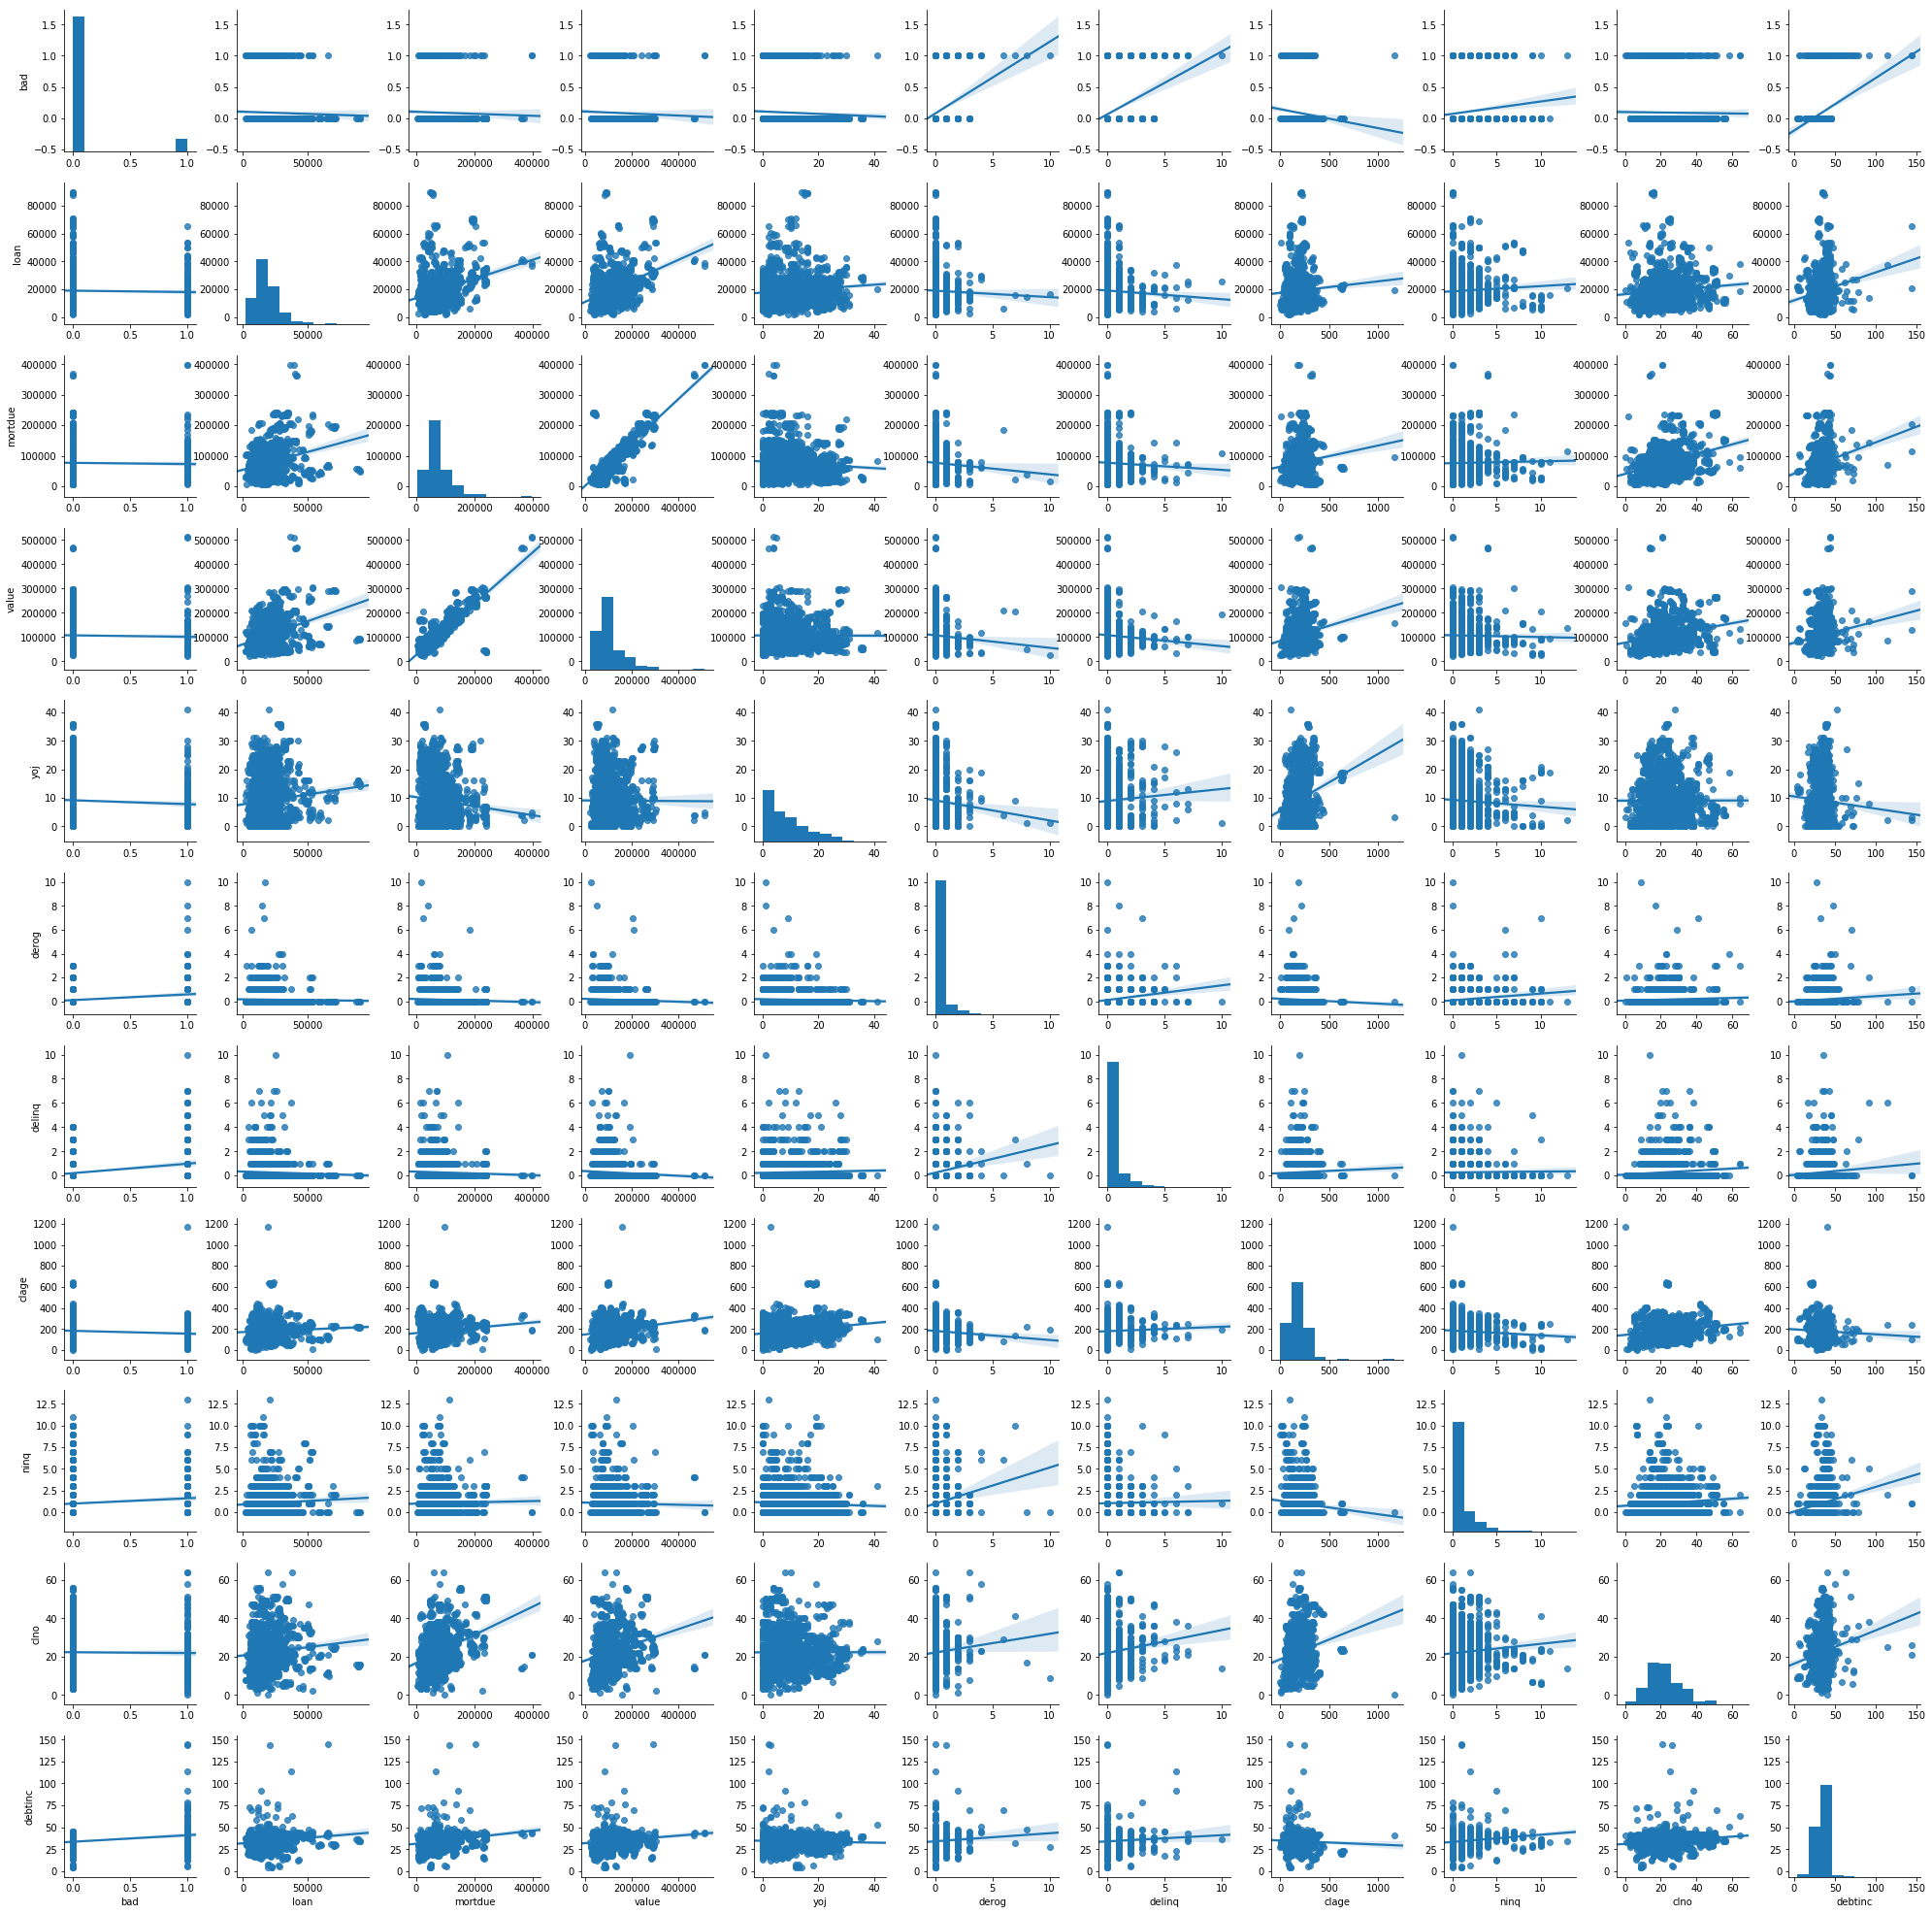

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_bank, kind="reg")
plt.show()

# We can fit linear line between mortdue and value columns

C:\Users\izele\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


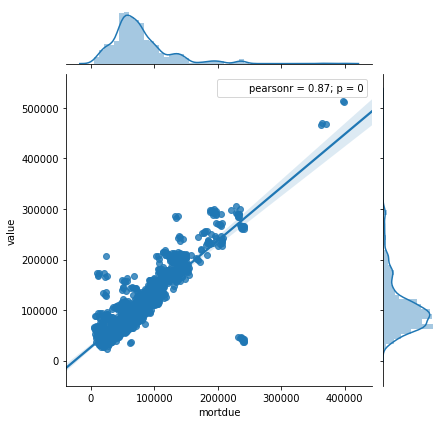

In [192]:
sns.jointplot(x = "mortdue", y = "value", data = df_bank, kind = "reg")
plt.show()

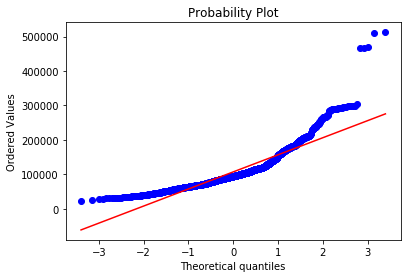

In [193]:
import scipy.stats as stats
import pylab
stats.probplot(df_bank['value'], dist="norm",plot=pylab) # normal probability plot
pylab.show()

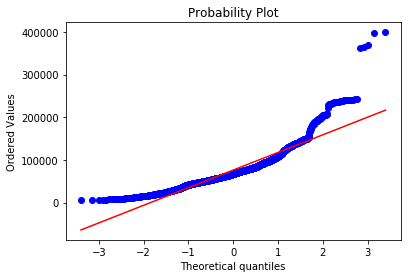

In [194]:
import scipy.stats as stats
import pylab
stats.probplot(df_bank['mortdue'], dist="norm",plot=pylab) # normal probability plot
pylab.show()

In [195]:
import statsmodels.api as sm
df = df_bank.copy()
dms = pd.get_dummies(df_bank[['reason','job']])
dms.head()
X_ = df_bank.drop(['value','reason','job'], axis=1).astype('float64')
X_.head()
X = pd.concat([X_, dms[['job_Mgr','reason_DebtCon','job_Office','job_ProfEx','job_Sales','job_Self']]], axis=1)
X = pd.concat([X, df[['value']]], axis=1)
df_bank = X.copy()
X= df_bank[['mortdue']]
X= sm.add_constant(X)
X[0:5]

C:\Users\izele\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [196]:
import statsmodels.api as sm
y = df_bank['value'] # Target column

In [197]:
lm = sm.OLS(y,X) # ordinary least square - oneway regression
model = lm.fit()
model.summary()

# h0 : beta0 = beta1 = 0
# h1 : At least one of them is different

# -----------------------------------------

# h0: beta0 = 0        h0 : beta1 = 0
# h1 : beta0 != 0      h1 : beta0 != 0
# Adj.R-squared 1'e yakın

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:49:08   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
# Model with StatsModels 

import statsmodels.formula.api as smf
import patsy

lm = smf.ols("value ~ mortdue", df_bank) # value değişkenini ~ dan sonraki değişkenlerle açıklıyorum
model = lm.fit()
model.summary()

#parametreleri çekti beta0 ve beta1
model.params
model.summary().tables[1]
model.conf_int()

,0,1
Intercept,24136.594103,28801.947746
mortdue,1.027212,1.080021


In [199]:
model.f_pvalue
print("f_pvalue : ","%.4f" % model.f_pvalue)
print("f_value : ","%.2f" % model.fvalue)
print("fvalue : ","%.2f" % model.tvalues[0:1])

f_pvalue :  0.0000
f_value :  6123.78
fvalue :  22.25


In [200]:
model.rsquared_adj

0.7522046086077612

In [201]:
model.fittedvalues[0:5] # predicted values

153    126275.218545
154    109957.856961
155    281371.808888
156     92835.532230
157     53714.744755
dtype: float64

In [202]:
y[0:5]
print("Value = "+str("%.2f" %model.params[0])+"+mortdue"+"*"+ str("%.2f" %model.params[1]))

Value = 26469.27+mortdue*1.05


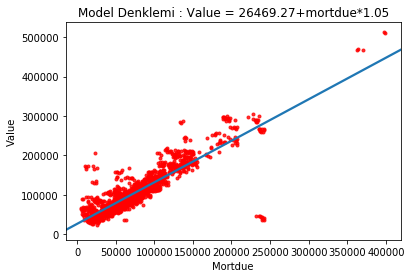

In [203]:
# Model denklemi --> value = 1.3125.mortdue + Error
g = sns.regplot(df_bank["mortdue"], df_bank['value'], ci = None, scatter_kws = {'color':'r', 's':9})
g.set_title("Model Denklemi : Value = 26469.27+mortdue*1.05")
g.set_ylabel("Value")
g.set_xlabel("Mortdue")
plt.show()

In [204]:
from sklearn.metrics import mean_squared_error, r2_score
lm = smf.ols("value ~ mortdue", df)
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues) #stats kısmındaki hesaplama
mse

722569435.9837799

In [205]:
import numpy as np

rmse = np.sqrt(mse)
print('rmse:' ,rmse)
k_t = pd.DataFrame({'gercek_y':y[0:10],"tahmin_y":model.fittedvalues[0:10]})
k_t

rmse: 26880.65170310757


,gercek_y,tahmin_y
153,136877.0,126275.218545
154,96784.0,109957.856961
155,36486.0,281371.808888
156,76718.0,92835.532230
157,43684.0,53714.744755
158,183533.0,174321.192949
159,97394.0,100969.453030
160,114906.0,110139.079030
161,103016.0,108816.790092
162,87025.0,80478.715760


In [206]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
153,136877.0,126275.218545,10601.781455
154,96784.0,109957.856961,-13173.856961
155,36486.0,281371.808888,-244885.808888
156,76718.0,92835.532230,-16117.532230
157,43684.0,53714.744755,-10030.744755
158,183533.0,174321.192949,9211.807051
159,97394.0,100969.453030,-3575.453030
160,114906.0,110139.079030,4766.920970
161,103016.0,108816.790092,-5800.790092
162,87025.0,80478.715760,6546.284240


In [207]:
k_t["hata_kare"] = k_t["hata"] ** 2
k_t

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,126275.218545,10601.781455,1.123978e+08
154,96784.0,109957.856961,-13173.856961,1.735505e+08
155,36486.0,281371.808888,-244885.808888,5.996906e+10
156,76718.0,92835.532230,-16117.532230,2.597748e+08
157,43684.0,53714.744755,-10030.744755,1.006158e+08
158,183533.0,174321.192949,9211.807051,8.485739e+07
159,97394.0,100969.453030,-3575.453030,1.278386e+07
160,114906.0,110139.079030,4766.920970,2.272354e+07
161,103016.0,108816.790092,-5800.790092,3.364917e+07
162,87025.0,80478.715760,6546.284240,4.285384e+07


60812266149.75379
6081226614.975379
77982.21986437279


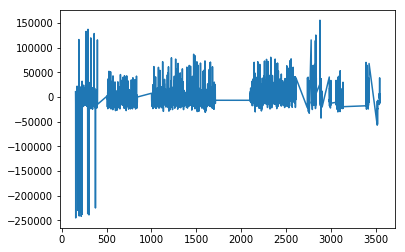

In [208]:
print(np.sum(k_t["hata_kare"]))
print(np.mean(k_t["hata_kare"]))
print(np.sqrt(np.mean(k_t["hata_kare"])))
model.resid[0:10]
plt.plot(model.resid)
plt.show() # constant error diyebiliriz

In [209]:
k_t["hata_kare"]

153    1.123978e+08
154    1.735505e+08
155    5.996906e+10
156    2.597748e+08
157    1.006158e+08
158    8.485739e+07
159    1.278386e+07
160    2.272354e+07
161    3.364917e+07
162    4.285384e+07
Name: hata_kare, dtype: float64

In [211]:
influence = model.get_influence()
influence

Leverange v.s studentized Residuals


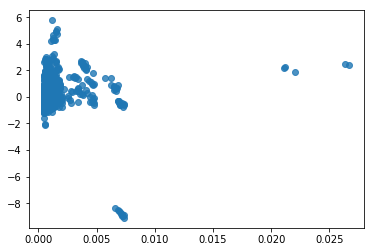

In [212]:
# outlierları detect etmek için, model normalden geliyor mu? errorlar normal dağılımdan geliyor mu?
resid_student=influence.resid_studentized_external 
(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage=influence.hat_matrix_diag
import seaborn as sns
print("Leverange v.s studentized Residuals")
sns.regplot(leverage, model.resid_pearson,fit_reg=False)
plt.show()

C:\Users\izele\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


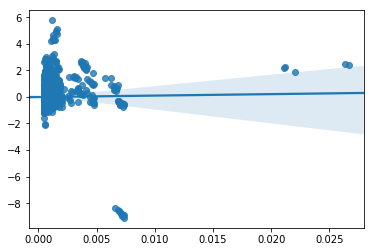

In [213]:
sns.regplot(leverage, model.resid_pearson,fit_reg=True) # Outlierları daha iyi anlayabilmek için yukarıdaki 
                                                        # grafiğe line fit ettim
plt.show()

In [214]:
advres=pd.concat([df_bank, pd.Series(model.resid, name="resid"),pd.Series(model.fittedvalues, name="predict")], axis=1)
model.predict()

array([126275.21854483, 109957.85696056, 281371.8088884 , ...,
       138385.4887101 ,  98946.50899664,  53545.11246873])

In [215]:
model.resid

153      10601.781455
154     -13173.856961
155    -244885.808888
156     -16117.532230
157     -10030.744755
            ...      
3544     -3284.675012
3546     38571.471598
3547      -658.488710
3548    -12774.508997
3549      5214.887531
Length: 2018, dtype: float64

In [216]:
advres.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,reason_DebtCon,job_Office,job_ProfEx,job_Sales,job_Self,value,resid,predict
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,136877.0,10601.781455,126275.218545
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,96784.0,-13173.856961,109957.856961
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,36486.0,-244885.808888,281371.808888
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0,76718.0,-16117.532230,92835.532230
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,43684.0,-10030.744755,53714.744755


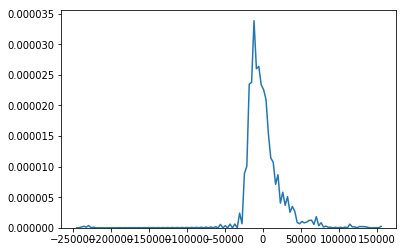

In [217]:
import numpy as np
sns.kdeplot(np.array(advres.resid), bw=10)#gaussiandan gelen residualların normaldden gelince nasıl olması gerektiğini gösteriyo
plt.show()

C:\Users\izele\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


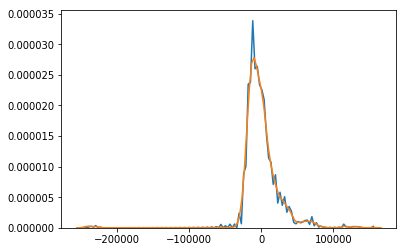

In [218]:
sns.kdeplot(np.array(advres.resid), bw=10)
sns.distplot(np.array(advres.resid), hist=False) #burada normalde olması gerekn ve olanı üst üste koyarak farkı görüyoruz
plt.show()

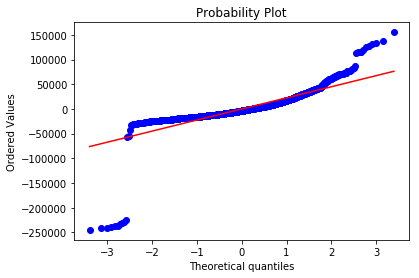

In [219]:
import scipy.stats as stats
import pylab
stats.probplot(advres.resid, dist="norm",plot=pylab)
pylab.show()

In [220]:
from scipy.stats import shapiro
stats, p = shapiro(advres.resid)
print("Statistics=%.3f, p=%.3f" %(stats,p))
alpha = 0.05
if p > alpha:
    print("Hatalar Normal(Gaussian) dağılımdan gelmektedir(Fail to reject)")
else:
    print("Hatalar Normal(Gaussian) dağılımdan gelmemektedir(reject H0)")

Statistics=0.698, p=0.000
Hatalar Normal(Gaussian) dağılımdan gelmemektedir(reject H0)


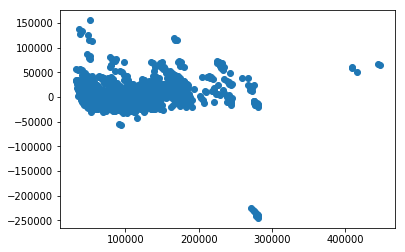

In [221]:
resid = model.resid
plt.scatter(model.fittedvalues, resid)
plt.show()

In [222]:
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_bank.shape
lm = smf.ols("value ~ mortdue", df_bank).fit()
lm.summary()

# F-statistic çok küçük h0 reject
# h0: beta,newspaper = 0
# h1: beta,newspaper != 0 --> fail to reject h0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:50:21   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
y, X = dmatrices("value ~ mortdue+loan", data= df_bank, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif 
# # datada x ler arasında bir ilişki var mı, korelasyon var mı --> bağımsız değşkenler birbiriyle ilişkili mi ?

[5.729452184639833, 1.0868285662599952, 1.0868285662599952]

In [247]:
# value değerini loan ve mortdue ile tahminlemek için
lm = smf.ols("value ~ mortdue+loan", df_bank) 
model = lm.fit()
model.summary()

#parametreleri çekti beta0 ve beta1
model.params
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.641e+04,1375.861,11.925,0.000,1.37e+04,1.91e+04
mortdue,1.0037,0.013,74.475,0.000,0.977,1.030
loan,0.7299,0.056,13.114,0.000,0.621,0.839


In [248]:
model.conf_int()

,0,1
Intercept,13708.238113,19104.757147
mortdue,0.977235,1.030093
loan,0.620764,0.839080


In [250]:
mse = mean_squared_error(y, model.fittedvalues) #stats kısmındaki hesaplama
mse

665750208.4759922

In [252]:
import numpy as np

rmse = np.sqrt(mse)
print('rmse:' ,rmse)
k_t = pd.DataFrame({'gercek_y':y[0:10],"tahmin_y":model.fittedvalues[0:10]})
k_t

rmse: 25802.135734779637


,gercek_y,tahmin_y
153,136877.0,124765.169028
154,96784.0,111776.147876
155,36486.0,284114.305511
156,76718.0,85757.642730
157,43684.0,55060.887155
158,183533.0,174693.812835
159,97394.0,101754.045385
160,114906.0,108737.122633
161,103016.0,103389.962571
162,87025.0,86322.346000


In [253]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"] ** 2
k_t

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,124765.169028,12111.830972,1.466964e+08
154,96784.0,111776.147876,-14992.147876,2.247645e+08
155,36486.0,284114.305511,-247628.305511,6.131978e+10
156,76718.0,85757.642730,-9039.642730,8.171514e+07
157,43684.0,55060.887155,-11376.887155,1.294336e+08
158,183533.0,174693.812835,8839.187165,7.813123e+07
159,97394.0,101754.045385,-4360.045385,1.901000e+07
160,114906.0,108737.122633,6168.877367,3.805505e+07
161,103016.0,103389.962571,-373.962571,1.398480e+05
162,87025.0,86322.346000,702.654000,4.937226e+05


In [254]:
y, X = dmatrices("value ~ mortdue+loan+derog+delinq", data= df_bank, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif 
# # datada x ler arasında bir ilişki var mı, korelasyon var mı --> bağımsız değşkenler birbiriyle ilişkili mi ?

[6.0182967466685025,
 1.0895588075933633,
 1.0882111362685039,
 1.0308760719163719,
 1.0312538665761914]

In [233]:
# value değerini loan ve mortdue ile tahminlemek için
lm = smf.ols("value ~ mortdue+loan+yoj+derog+delinq", df_bank) 
model = lm.fit()
model.summary()

# Bu modele göre derog açıklayıcı bir değişken değil

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:54:29   Log-Likelihood:                -23343.
No. Observations:                2018   AIC:                         4.670e+04
Df Residuals:                    2012   BIC:                         4.673e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.325e+04   1554.206      8.527      0.000    1.02e+04    1.63e+04
mortdue        1.0122      0.013     75.054      0.000       0.986       1.039
loan           0.6830      0.056     12.262      0.000       0.574       0.792
yoj          436.4040     76.489      5.705      0.000     286.399     586.409
derog       -255.8950    999.179     -0.256      0.798   -2215.428    1703.638
delinq     -1885.5879    733.919     -2.569      0.010   -3324.909    -446.267
==============================================================================
Omnibus:                     1458.305   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116075.810
Skew:                          -2.688   Prob(JB):                         0.00
Kurtosis:                      39.764   Cond. No.                     2.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
# value değerini loan ve mortdue ile tahminlemek için
lm = smf.ols("value ~ mortdue+loan+yoj+derog+delinq+clage+ninq+clno+debtinc+job_Mgr+reason_DebtCon+job_Office+job_ProfEx+job_Sales+job_Self", df_bank) 
model = lm.fit()
model.summary()

# derog, delinq, ninq, debtinc, job_office, job_sales açıklayıcı değişken değil

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     521.9
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:57:25   Log-Likelihood:                -23248.
No. Observations:                2018   AIC:                         4.653e+04
Df Residuals:                    2002   BIC:                         4.662e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.104e+04   2982.415      7.055      0.000    1.52e+04    2.69e+04
mortdue            1.0135      0.014     70.175      0.000       0.985       1.042
loan               0.7083      0.056     12.672      0.000       0.599       0.818
yoj              341.7714     76.146      4.488      0.000     192.437     491.105
derog           1143.1625    975.787      1.172      0.242    -770.501    3056.826
delinq         -1381.3998    709.203     -1.948      0.052   -2772.252       9.453
clage             40.5143      6.897      5.874      0.000      26.988      54.041
ninq            -571.6865    361.699     -1.581      0.114   -1281.032     137.659
clno            -486.9379     63.657     -7.649      0.000    -611.780    -362.096
debtinc         -132.4423     68.342     -1.938      0.053    -266.471       1.587
job_Mgr        -3638.6299   1760.996     -2.066      0.039   -7092.206    -185.054
reason_DebtCon -2852.7781   1258.593     -2.267      0.024   -5321.067    -384.490
job_Office      1947.6371   1598.088      1.219      0.223   -1186.453    5081.728
job_ProfEx      9469.8400   1466.008      6.460      0.000    6594.778    1.23e+04
job_Sales       2822.4695   4603.697      0.613      0.540   -6206.070    1.19e+04
job_Self        1.303e+04   3558.360      3.660      0.000    6046.635       2e+04
==============================================================================
Omnibus:                     1264.504   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89801.080
Skew:                          -2.165   Prob(JB):                         0.00
Kurtosis:                      35.392   Cond. No.                     7.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
# train test split ile model kurulunca --> bütün değişkenler için
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X=df_bank.drop("value", axis=1)
y=df_bank["value"]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
training=df.copy()
print(training.shape)

(1614, 16)
(1614,)
(404, 16)
(404,)
(2018, 13)


In [256]:
y, X = dmatrices("value ~ mortdue+loan+yoj+derog+delinq+clage+ninq+clno+debtinc+job_Mgr+reason_DebtCon+job_Office+job_ProfEx+job_Sales+job_Self", data= df_bank, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif 
# # datada x ler arasında bir ilişki var mı, korelasyon var mı --> bağımsız değşkenler birbiriyle ilişkili mi ?

[29.971938107233285,
 1.389575667811579,
 1.2202883005019425,
 1.1199446573034062,
 1.0803383695811375,
 1.056709444768406,
 1.1417885597631785,
 1.0977397295789721,
 1.2206461462901945,
 1.120112989267235,
 1.2072438677785384,
 1.1042997628767417,
 1.2280999031815174,
 1.417641100226179,
 1.0458937372283243,
 1.1910229005651014]

In [257]:
lm=sm.OLS(y_train, X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              2178.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):                        0.00
Time:                        21:05:09   Log-Likelihood:                         -18653.
No. Observations:                1614   AIC:                                  3.734e+04
Df Residuals:                    1598   BIC:                                  3.742e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bad             2059.3099   2447.676      0.841      0.400   -2741.683    6860.303
loan               0.7360      0.066     11.149      0.000       0.607       0.865
mortdue            1.0129      0.017     61.371      0.000       0.981       1.045
yoj              399.4909     86.767      4.604      0.000     229.301     569.681
derog           1447.3056   1137.526      1.272      0.203    -783.894    3678.505
delinq         -1529.0680    907.193     -1.685      0.092   -3308.481     250.345
clage             57.8617      7.566      7.648      0.000      43.022      72.702
ninq            -520.3285    427.057     -1.218      0.223   -1357.979     317.322
clno            -435.7319     72.173     -6.037      0.000    -577.295    -294.169
debtinc          218.2081     60.711      3.594      0.000      99.127     337.289
job_Mgr        -3732.0688   2058.125     -1.813      0.070   -7768.977     304.839
reason_DebtCon  -175.2035   1406.979     -0.125      0.901   -2934.922    2584.515
job_Office      3709.0431   1831.740      2.025      0.043     116.177    7301.910
job_ProfEx      1.182e+04   1668.877      7.082      0.000    8545.333    1.51e+04
job_Sales       2188.6812   5261.650      0.416      0.677   -8131.781    1.25e+04
job_Self        1.374e+04   4058.573      3.384      0.001    5774.901    2.17e+04
==============================================================================
Omnibus:                     1096.254   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73690.563
Skew:                          -2.458   Prob(JB):                         0.00
Kurtosis:                      35.735   Cond. No.                     7.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""